# Product Matching
## Level 2: Data Exploration Script

### Notes:
1. Summarize the training data
2. Visualize the training data
3. Insights here will drive feature creation in the next level script

### References: 

## Notebook Config

In [1]:
# Display settings
## Auto reload modules & inline plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Package Import & Initialization

In [2]:
# Import packages

import pandas as pd                  #For data manipulation and bgq --> pandas conversion
import numpy as np                   #For scientific computation
import os                            #For work with native operating system and directories
from pathlib import Path             #For working with file paths and directories
import warnings                      #To tweak warning options
import matplotlib.pyplot as plt      #Standard plotting package
import seaborn as sns                #For even cooler plotting options

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')

## Function Library

## Custom Tranformers

## Set Directories

In [4]:
#cwd = os.getcwd()
#os.chdir(cwd)
home = str(Path.home())
proj_path = os.path.join(home, 'Cardinal Health', 'Enterprise Data Remediation - Documents', 'General', '01_Projects', 
                         '23_Kinaxis')

In [5]:
main_dir = proj_path + '\\'
iput_dir = main_dir + 'Data\\Output\\ML\\'

## Set Output File Names

## Load Data

In [6]:
raw_df = pd.read_pickle(iput_dir + "L100_trn_df_2022-07-14.pkl")

## High-level Data Inspection

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 101189
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ITEMNUMBER              1626 non-null   object 
 1   Number                  1626 non-null   object 
 2   ITEMDESCRIPTION         1626 non-null   object 
 3   FullDescription         1626 non-null   object 
 4   SUPPLIER_ITEM_NUMBER    1626 non-null   object 
 5   ManufacturerItemNumber  1601 non-null   object 
 6   SUPPLIERNAME            1626 non-null   object 
 7   ManufacturerName        1626 non-null   object 
 8   UNSPCCode               1602 non-null   float64
 9   UNSPSC                  1626 non-null   int64  
 10  Feat_1                  1626 non-null   int64  
 11  Feat_2                  1626 non-null   int64  
 12  Feat_3                  1626 non-null   int64  
 13  Feat_4                  1626 non-null   int64  
 14  Feat_5                  1626 non-null 

In [8]:
raw_df.head()

,ITEMNUMBER,Number,ITEMDESCRIPTION,FullDescription,SUPPLIER_ITEM_NUMBER,ManufacturerItemNumber,SUPPLIERNAME,ManufacturerName,UNSPCCode,UNSPSC,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Match_Confidence,Match,Comments,Unnamed: 17
0,XB415122,415122,CARESITE Luer Access Device,"DEVICE ACCESS LUER CARESITE STERILE 100/BX, 2B...",415122,415122,B BRAUN MEDICAL,B BRAUN MEDICAL INC,42221602.0000,42222202,1,100,100,0,0,01 High,Yes,NaN,NaN
1,XB415122,415110,CARESITE Luer Access Device,IV CONNECTOR ULTRASITE LL 100EA/CS,415122,NaN,B BRAUN MEDICAL,B BRAUN MEDICAL INC,42221602.0000,42221604,0,100,39,0,0,03 Low,No,NaN,NaN
2,XB415122,B2000B,CARESITE Luer Access Device,CAP REPLACEMENT BLUE LUER TAB 100/BX 10BX/CS,415122,NaN,B BRAUN MEDICAL,B BRAUN MEDICAL INC,42221602.0000,42221604,0,100,39,0,0,03 Low,No,NaN,NaN
3,DX4521,4521,Suture Removal Kit with Littauer Scissors and ...,SUTURE REMOVAL KIT 50/CS,4521,4521,DYNAREX,DYNAREX CORPORATION,42312207.0000,42312207,1,100,86,0,1,01 High,Yes,NaN,NaN
4,DX4521,4515,Suture Removal Kit with Littauer Scissors and ...,COLD PACK PERINEAL INSTANT W/SELF ADHESIVE STR...,4521,4515,DYNAREX,DYNAREX CORPORATION,42312207.0000,42142108,0,100,44,0,0,03 Low,No,NaN,NaN


## Descriptive metrics

In [9]:
raw_df.describe()

,UNSPCCode,UNSPSC,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5
count,1602.0000,1626.0000,1626.0000,1626.0000,1626.0000,1626.0000,1626.0000
mean,42311346.1660,42553918.6544,0.2392,98.9041,65.3395,0.0000,0.6242
std,4607886.7725,4561705.3087,0.4267,5.7578,13.2046,0.0000,0.4845
min,14111703.0000,13111210.0000,0.0000,27.0000,21.0000,0.0000,0.0000
25%,42132205.0000,42132203.0000,0.0000,100.0000,55.0000,0.0000,0.0000
50%,42142529.0000,42142531.0000,0.0000,100.0000,66.0000,0.0000,1.0000
75%,42182702.0000,42221512.0000,0.0000,100.0000,74.0000,0.0000,1.0000
max,98999941.0000,99999999.0000,1.0000,100.0000,100.0000,0.0000,1.0000


In [10]:
raw_df.describe(include=[np.object])

,ITEMNUMBER,Number,ITEMDESCRIPTION,FullDescription,SUPPLIER_ITEM_NUMBER,ManufacturerItemNumber,SUPPLIERNAME,ManufacturerName,Match_Confidence,Match,Comments,Unnamed: 17
count,1626,1626,1626,1626,1626,1601,1626,1626,1626,1626,4,1
unique,545,614,538,580,543,567,19,24,3,2,4,1
top,XB415122,2D72PT70X,U-100 Insulin Syringe with Micro-Fine IV Needl...,GLOVE SURGICAL PROTEXIS PI,415122,2D72PT70X,BECTON DICKINSON CONSUMER,CARDINAL HEALTH,03 Low,No,"This is likely the same item, but wrong descri...","Same item, different UOM. 60MDS190510H is an ..."
freq,3,73,6,73,3,73,612,716,795,1238,1,1


In [11]:
## Is there strong evidence of class imbalance?
raw_df.Match.value_counts()

No     1238
Yes     388
Name: Match, dtype: int64

In [12]:
## Two-way table: Product match vs. Supplier Item Number Exact Match 
raw_df.groupby(['Feat_1','Match']).size()

Feat_1  Match
0       No       1234
        Yes         3
1       No          4
        Yes       385
dtype: int64

In [13]:
## Two-way table: Product match vs. Item Number Exact Match 
raw_df.groupby(['Feat_4','Match']).size()

Feat_4  Match
0       No       1238
        Yes       388
dtype: int64

In [14]:
## Two-way table: Product match vs. UNSPSC Exact Match 
raw_df.groupby(['Feat_5','Match']).size()

Feat_5  Match
0       No       512
        Yes       99
1       No       726
        Yes      289
dtype: int64

## Plots

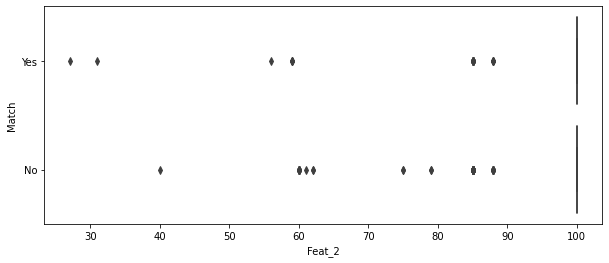

In [15]:
## Product match vs. Supplier name set ratio

(
    raw_df
    .filter(['Feat_2','Match'])
    .pipe(
        (sns.boxplot, 'data'),
        y='Match', 
        x='Feat_2',
        orient='h'
    )
)

plt.gcf().set_size_inches(10,4)

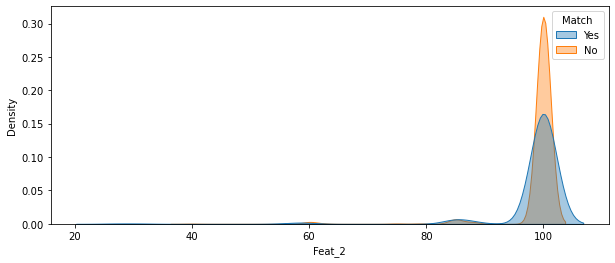

In [16]:
## Product match vs. Supplier name set ratio

(
    raw_df
    .filter(['Feat_2','Match'])
    .pipe(
        (sns.kdeplot, 'data'),
        x='Feat_2',
        hue='Match',
        fill=True,
        alpha=0.4,
        common_norm=False,
    )
)

plt.gcf().set_size_inches(10,4)

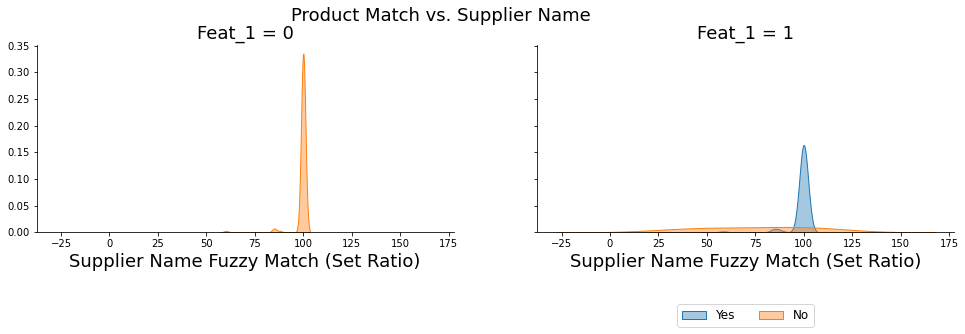

In [17]:
## Product match vs. Supplier name set ratio - Group by supplier item number exact match

(
    raw_df
    .filter(['Feat_1','Feat_2','Match'])
    .pipe(
        (sns.FacetGrid, 'data'),
        col='Feat_1',
        hue='Match',
    )
    .map(sns.kdeplot, 'Feat_2',  fill=True, alpha=0.4, common_norm=False)
    .set_axis_labels('Supplier Name Fuzzy Match (Set Ratio)','', fontsize=18)
    .set_titles(size=18)
    .fig.suptitle('Product Match vs. Supplier Name', fontsize=18)
)

plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.35), ncol=5, fontsize=12)
# plt.tick_params(labelsize=20)
plt.gcf().set_size_inches(15,4)
plt.subplots_adjust(top=0.85, hspace=0.2, wspace=0.2)

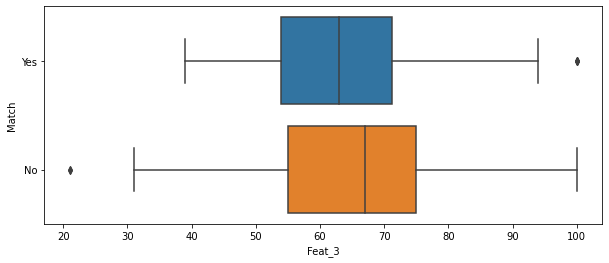

In [18]:
## Product match vs. Product description set ratio

(
    raw_df
    .filter(['Feat_3','Match'])
    .pipe(
        (sns.boxplot, 'data'),
        y='Match', 
        x='Feat_3',
        orient='h'
    )
)

plt.gcf().set_size_inches(10,4)

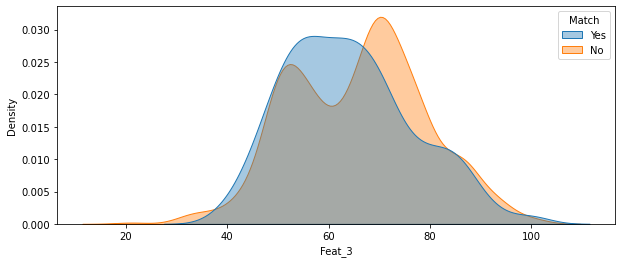

In [19]:
## Product match vs. Product description set ratio

(
    raw_df
    .filter(['Feat_3','Match'])
    .pipe(
        (sns.kdeplot, 'data'),
        x='Feat_3',
        hue='Match',
        fill=True,
        alpha=0.4,
        common_norm=False,
    )
)

plt.gcf().set_size_inches(10,4)

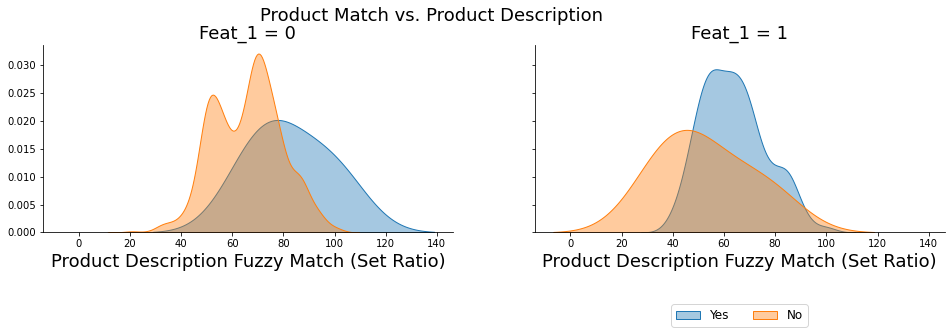

In [20]:
## Product match vs. Product description set ratio - Group by supplier item number exact match

(
    raw_df
    .filter(['Feat_1','Feat_3','Match'])
    .pipe(
        (sns.FacetGrid, 'data'),
        col='Feat_1',
        hue='Match',
    )
    .map(sns.kdeplot, 'Feat_3',  fill=True, alpha=0.4, common_norm=False)
    .set_axis_labels('Product Description Fuzzy Match (Set Ratio)','', fontsize=18)
    .set_titles(size=18)
    .fig.suptitle('Product Match vs. Product Description', fontsize=18)
)

plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.35), ncol=5, fontsize=12)
# plt.tick_params(labelsize=20)
plt.gcf().set_size_inches(15,4)
plt.subplots_adjust(top=0.85, hspace=0.2, wspace=0.2)

## Appendix

In [ ]:
(
    raw_df
    .filter(['Feat_3','Match'])
    .hist(by=['Match'],density=True,grid=False,figsize=(20,10))
);

In [ ]:
## Plot sample group_id weights and volume

(
    df_good_req
    .merge(df_grps_huc, how="left", on="group_id")
    #.query('group_id in ["1100542312011_100157_EA","1001742241703_101849_BX","1103042312201_100609_BX"]') #50-member groups
    #.query('group_id in ["1002542141607_117263_EA","1102942294906_100157_BX","1102942294906_100157_EA"]') #10-member groups
    #.query('group_id in ["1003942142703_101124_CS","1100542294905_100566_BX","1000742271640_102000_CS"]') #5-member groups
    .query('group_id in ["1102942294906_100157_BX"]') #10-member group
    #.query('members in [264,997]')
    #.query('members == 264')
    #.query('members == 997')
    .pipe(
        (sns.FacetGrid, 'data'),
        #row='cut', 
        col='group_id', 
        #col_wrap=3,
        hue='product',
        #hue_order=list('DEFGHIJ'),
        sharex=True,
        sharey=True,
        #height=6,
        size=5,
        aspect=3,
        #legend_out=True
    )
    .map(sns.scatterplot, 'gross_weight_remediated', 'volume_IN_remediated', alpha=0.8, s=200)
    .set_axis_labels('Gross Weight','Volume', fontsize=18)
    .set_titles(size=20)
    .fig.suptitle('Volume over Gross Weight', fontsize=24)
    #.add_legend()
)

plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15), ncol=5, fontsize=12)
plt.tick_params(labelsize=20)
plt.gcf().set_size_inches(15,8)
plt.subplots_adjust(top=0.85, hspace=0.2, wspace=0.2)